In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('ofertas_relampago.csv')
# df.info()

## Criterios
* Si la cantidad vendida está vacía significa que no se vendió nada
* Si el precio de venta está vació indica un error en la carga del atributo
* Si el tiempo de la oferta es negativo o 0 supone un error en la configuración porque no es tiempo suficiente para que alguien intente comprar un producto, se puede tomar un criterio de corte en base al tiempo promedio que tarda una persona en comprar una vez ingresado al segmento del producto

In [3]:
df.dropna(subset=['SOLD_AMOUNT'], inplace=True)
df.SOLD_QUANTITY.fillna(0, inplace=True)

# ¿Cuánto es el tiempo en el que están activas estas ofertas?

In [5]:
df[['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM']]=df[['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM']].apply(pd.to_datetime)
# df.info()

df['time_active'] = df.OFFER_FINISH_DTTM - df.OFFER_START_DTTM
df.time_active = df.time_active.astype('timedelta64[s]')

df = df[df.time_active > 0]

In [6]:
avg = df.time_active.mean()
std = df.time_active.std()
df.time_active.transform(lambda x: x if avg - std < x < avg + std else avg).describe()

count    24579.000000
mean     21554.515928
std       1163.860460
min      16342.000000
25%      21422.448960
50%      21601.000000
75%      21603.000000
max      26458.000000
Name: time_active, dtype: float64

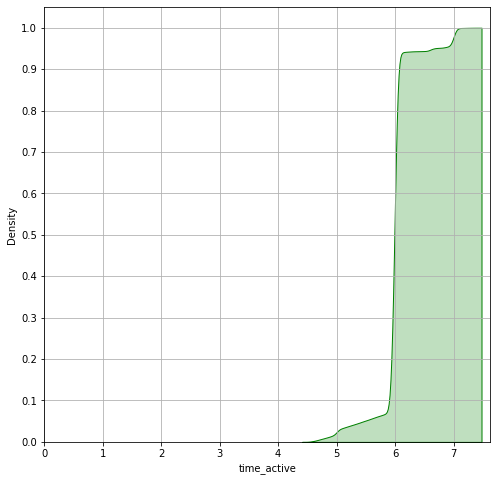

In [7]:
plt.figure(figsize=(8,8))
sns.kdeplot(df.time_active.transform(lambda x: x if avg - std < x < avg + std else avg), shade=True, bw_adjust=1, cumulative=True, color='green')
plt.grid()
plt.yticks(np.linspace(0,1,11))
plt.xticks( labels = list(range(8)), ticks=np.array(range(0, 28001, 3600)))
plt.show()

El 90% de las ofertas tiene menos de 6 horas y media de vida

In [8]:
df[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']]

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,4,-2,4.72,6.0,none,PETS FOOD,CPG,MLM-BIRD_FOODS
2,15,12,10.73,3.0,none,COMPUTERS,CE,MLM-SPEAKERS
3,15,13,7.03,2.0,none,COMPUTERS,CE,MLM-HEADPHONES
4,15,0,39.65,15.0,none,COMPUTERS,CE,MLM-HEADPHONES
7,10,-1,103.03,11.0,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...
48737,10,7,33.97,3.0,free_shipping,MOBILE,CE,MLM-TELEPHONES
48740,15,15,21.23,2.0,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48741,15,9,16.28,6.0,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48743,5,3,16.62,2.0,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


eliminamos outliers

In [9]:
df_no_outliers = df[(np.abs(stats.zscore(df[['SOLD_QUANTITY','SOLD_AMOUNT']])) < 3).all(axis=1)]

In [10]:
df_shipping = df_no_outliers[df_no_outliers['SHIPPING_PAYMENT_TYPE'] == 'free_shipping']

df_no_shipping = df_no_outliers[df_no_outliers['SHIPPING_PAYMENT_TYPE'] != 'free_shipping']


In [11]:
df_no_outliers

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,time_active
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,25363.0
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS,21601.0
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,23772.0
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,10092.0
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,14739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48737,2021-06-19,2021-06-19 15:00:00+00:00,2021-06-19 23:00:00+00:00,lightning_deal,10,7,33.97,3.0,A,free_shipping,MOBILE,CE,MLM-TELEPHONES,28800.0
48740,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:02+00:00,lightning_deal,15,15,21.23,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS,21602.0
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS,21601.0
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS,21603.0


In [12]:
ship_q = df_shipping['SOLD_QUANTITY'].mean()
df_shipping['SOLD_QUANTITY'].agg({'avg':'mean', 'deviation':'std'})

avg          4.044037
deviation    8.234482
Name: SOLD_QUANTITY, dtype: float64

In [13]:
no_ship_q = df_no_shipping['SOLD_QUANTITY'].mean()
df_no_shipping['SOLD_QUANTITY'].agg({'avg':'mean', 'deviation':'std'})

avg           8.075497
deviation    16.046263
Name: SOLD_QUANTITY, dtype: float64

In [14]:
ship_a = df_shipping['SOLD_AMOUNT'].mean()
df_shipping['SOLD_AMOUNT'].agg({'avg':'mean', 'deviation':'std'})

avg          42.815311
deviation    68.291389
Name: SOLD_AMOUNT, dtype: float64

In [15]:
no_ship_a = df_no_shipping['SOLD_AMOUNT'].mean()
df_no_shipping['SOLD_AMOUNT'].agg({'avg':'mean', 'deviation':'std'})

avg          20.531836
deviation    47.677428
Name: SOLD_AMOUNT, dtype: float64

* Cuando hay envío gratis se vende mayor cantidad a menor precio 
* Cuando no hay envío gratis la situación se revierte

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

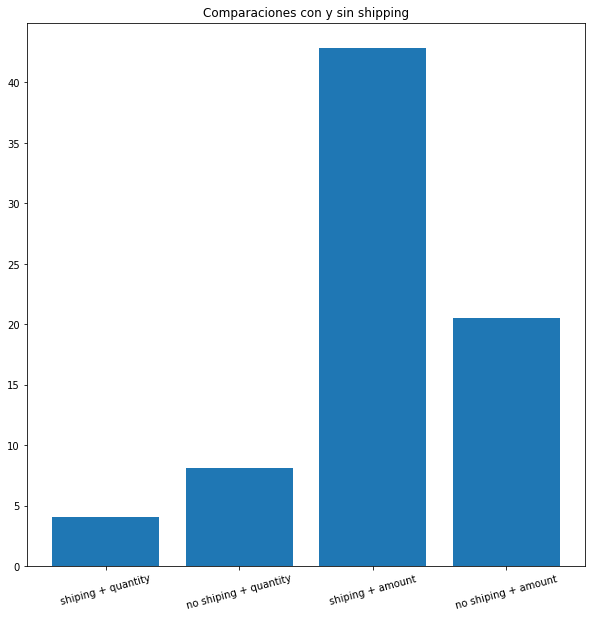

In [27]:
plt.figure(figsize=(10,10))
plt.bar(['shiping + quantity','no shiping + quantity', 'shiping + amount', 'no shiping + amount'], [ship_q, no_ship_q, ship_a, no_ship_a])
plt.title('Comparaciones con y sin shipping')
plt.xticks(rotation=15)

In [28]:
venta_total_sin = df_no_shipping['SOLD_AMOUNT'] * df_no_shipping['SOLD_QUANTITY']
venta_total_sin.sum()/venta_total_sin.count()

851.4842630023168

In [29]:
venta_total_con = df_shipping['SOLD_AMOUNT'] * df_shipping['SOLD_QUANTITY']
venta_total_con.sum()/venta_total_con.count()

485.51285069052375

### En promedio el monto por cada producto vendido con envío gratis es de \\$831.5 mayor que el monto por cada producto sin envío gratis de \\$485,5
esto quiere decir que la ganancia es una venta de volúmen y no de margenes

## ¿Hay mayor stock involucrado cuando el precio es más bajo?

In [19]:
df[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY']]

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
0,4,-2,4.72,6.0
2,15,12,10.73,3.0
3,15,13,7.03,2.0
4,15,0,39.65,15.0
7,10,-1,103.03,11.0
...,...,...,...,...
48737,10,7,33.97,3.0
48740,15,15,21.23,2.0
48741,15,9,16.28,6.0
48743,5,3,16.62,2.0


In [20]:
df[['INVOLVED_STOCK','SOLD_QUANTITY', 'SOLD_AMOUNT']].corr('spearman')

,INVOLVED_STOCK,SOLD_QUANTITY,SOLD_AMOUNT
INVOLVED_STOCK,1.000000,0.325797,0.296084
SOLD_QUANTITY,0.325797,1.000000,0.652547
SOLD_AMOUNT,0.296084,0.652547,1.000000


Esta correlación positiva indica que existe mayor stock disponible cuando el precio de venta individual aumenta y la cantidad vendida aumenta, esto sugiere que con ofertas relampago se pueden vender más productos a mayor precio

In [21]:
ventas = pd.concat([df[df.SOLD_QUANTITY > df.INVOLVED_STOCK]['DOM_DOMAIN_AGG1'].value_counts(normalize=True),df[df.SOLD_QUANTITY < df.INVOLVED_STOCK]['DOM_DOMAIN_AGG1'].value_counts(normalize=True)], axis=1)
ventas.columns=['over_sold','under_sold']

In [22]:
ventas

,over_sold,under_sold
PHARMACEUTICS,0.192090,0.082378
HOME&DECOR,0.188055,0.136038
SPORTS,0.087974,0.067087
COMPUTERS,0.084746,0.083811
PERSONAL CARE,0.064568,0.061783
AUTOPARTS,0.057304,0.034834
PETS FOOD,0.040355,0.007789
APPAREL,0.036320,0.084767
APPAREL ACCESORIES,0.035513,0.089784
BEAUTY EQUIPMENT,0.030670,0.028622


In [23]:
propor_sold = df[df.SOLD_QUANTITY < df.INVOLVED_STOCK].SOLD_QUANTITY / df[df.SOLD_QUANTITY < df.INVOLVED_STOCK].INVOLVED_STOCK
propor_sold = pd.concat([df[df.SOLD_QUANTITY < df.INVOLVED_STOCK].DOM_DOMAIN_AGG1, propor_sold], axis=1)
propor_sold.columns = ['DOM_DOMAIN_AGG1', 'proportion']
avg_propor_sold = propor_sold.groupby('DOM_DOMAIN_AGG1').mean()

In [24]:
avg_propor_sold.sort_values('proportion', ascending=False)

,proportion
DOM_DOMAIN_AGG1,
ANTIQUES & HOBBIES,0.444444
WHEELS & TIRES,0.437500
VEHICULAR MULTIMEDIA,0.398512
PETS FOOD,0.372096
SECURITY,0.334317
OTHER,0.323810
AUTOPARTS,0.322952
BATTERIES,0.315812
SUPLEMENTS,0.311900


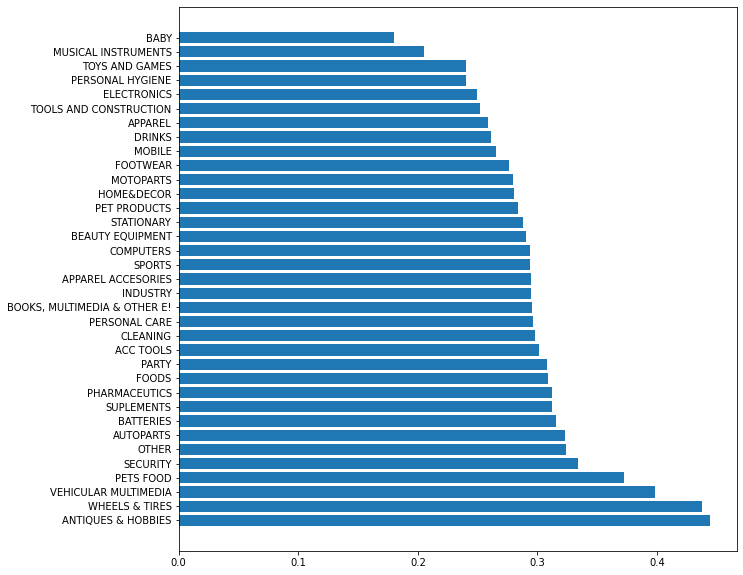

In [52]:
fig = plt.figure(figsize=(10,10))
plt.barh(avg_propor_sold.sort_values('proportion', ascending=False).index, width=avg_propor_sold.sort_values('proportion', ascending=False)
['proportion'])
plt.show()

* los 3 artículos más vendidos en relación al stock involucrado pertencen a las categorías de antiguedades y hobbis, ruedas y neumáticos y multimedia vehicular
* los 3 artículos menos vendidos en relación al stock involucrado pertencen a juegos y juguetes, artículos para bebes e instrumentos musicales